## Evaluate the model

#### Setup

In [3]:
import os
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
os.sys.path.append('./audioset/yamnet')
import params
from datagen_yamnet import DataGenerator, get_files_and_labels

model = tf.keras.models.load_model("I:/model/vehicle/v1/yamnet_ep20_batch4/model.h5")
test_dir = "I:/datasets/vehicle/dataset/v1_spectrograms/test_set/"

#### Get test data files and labels

In [33]:
files_test, labels_test, _, _, class_dict = get_files_and_labels(test_dir, typ='npy', train_split=1)

class_dict_rev = {(str(v)): k for k, v in class_dict.items()}

In [43]:
batch_size = 1

test_generator = DataGenerator(files_test,
                                labels_test,
                                shuffle=False,
                                batch_size=batch_size)

#### Evaluate

In [44]:
evaluate = model.evaluate(test_generator, verbose=1)
print("Evaluate value:", evaluate)

3671/3671 [==============================] - 26s 7ms/step - loss: 0.1653
Evaluate value: 0.16528058052062988


#### Predict

In [52]:
predict = model.predict(test_generator, verbose=1)
print("Predict value:", predict)

3671/3671 [==============================] - 18s 5ms/step
[[9.9953461e-01 4.6540043e-04]
 [9.9875760e-01 1.2424232e-03]
 [9.9054319e-01 9.4568590e-03]
 ...
 [9.4218314e-01 5.7816841e-02]
 [3.9081541e-03 9.9609178e-01]
 [4.4241667e-01 5.5758333e-01]]


#### Calcurate confusion metrix

In [58]:
y_true = []
for i, ID in enumerate(test_generator.list_IDs):
    class_id = ID.split('/')[-2]
    y_true.append(class_dict_rev.get(class_id))
y_true = np.array(y_true)
y_pred = np.array(predict[:,1])

fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)


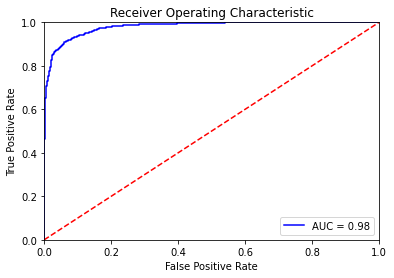

In [60]:
auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()